In [1]:
import lightkurve as lk
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\maria\anaconda3\envs\master_astro\lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


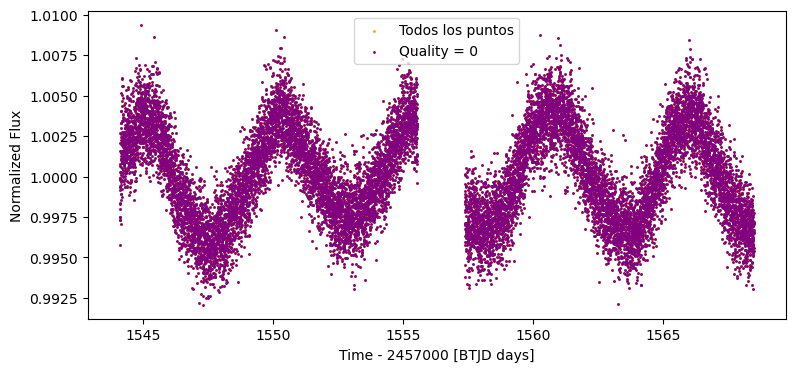

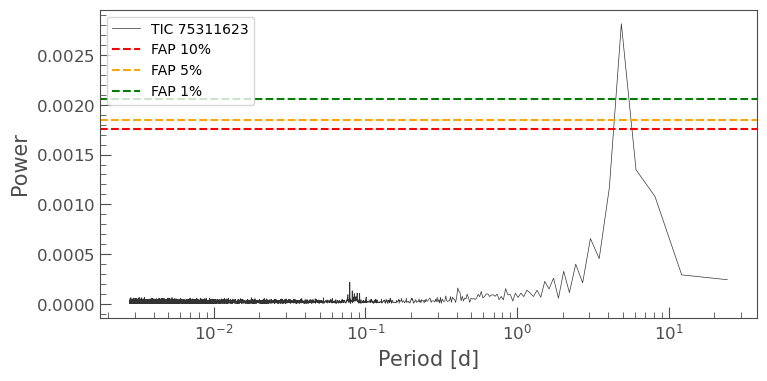

Periodo calculado: 4.872757002420576 d
Periodo real: 5.23983


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

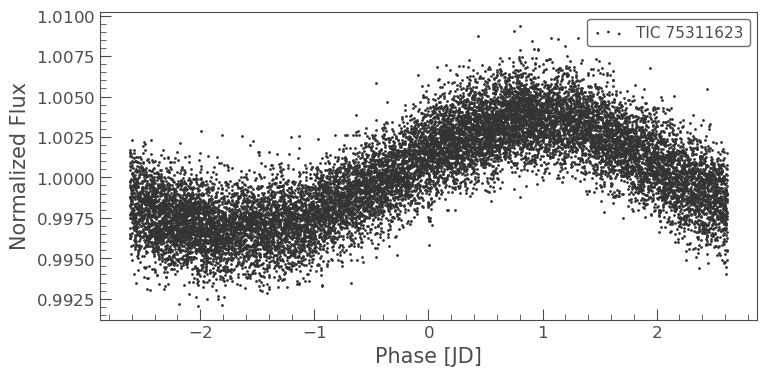

In [95]:
# OBJETO 1: TYC 8170-690-1

TIC = 'TIC 75311623'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author='SPOC', sector=9).download()
lc = sector_data.remove_nans().normalize()
# lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=5.23983
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

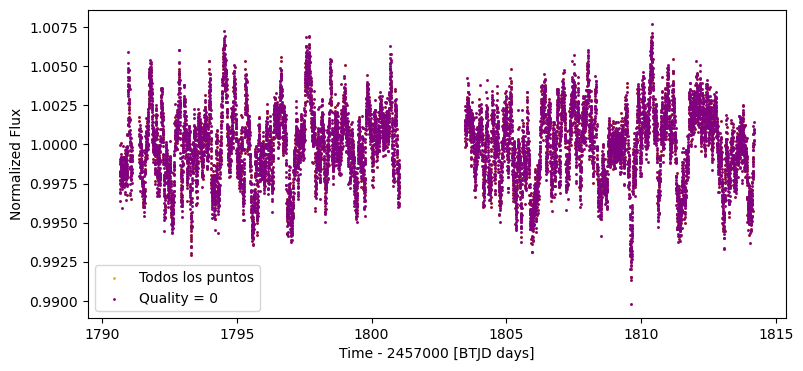

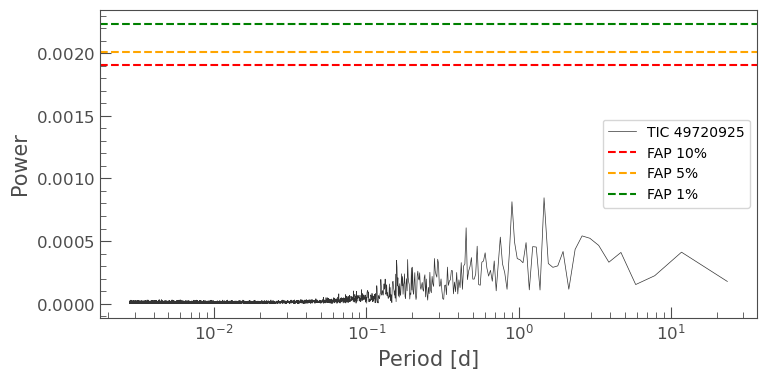

Periodo calculado: 1.4693681092036854 d
Periodo real: 1.45101


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

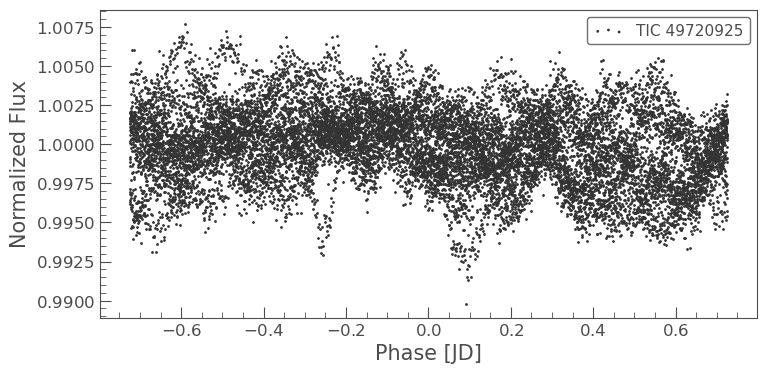

In [101]:
# OBJETO 2: HD 15629

TIC = 'TIC 49720925'
## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show() 

## Periodo del artículo
period_good=1.45101
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

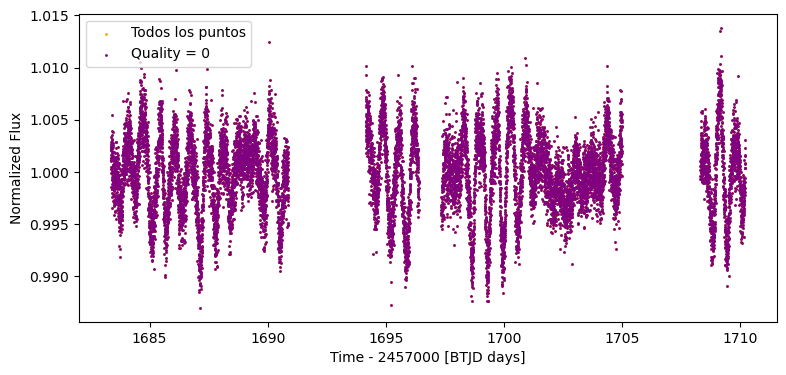

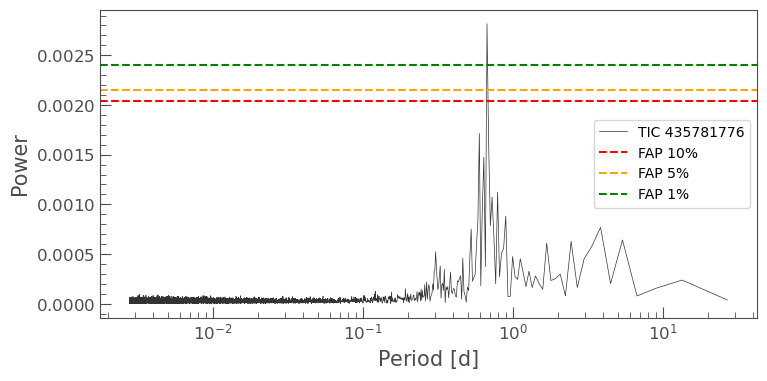

Periodo calculado: 0.6712480967975465 d
Periodo real: 0.677533


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

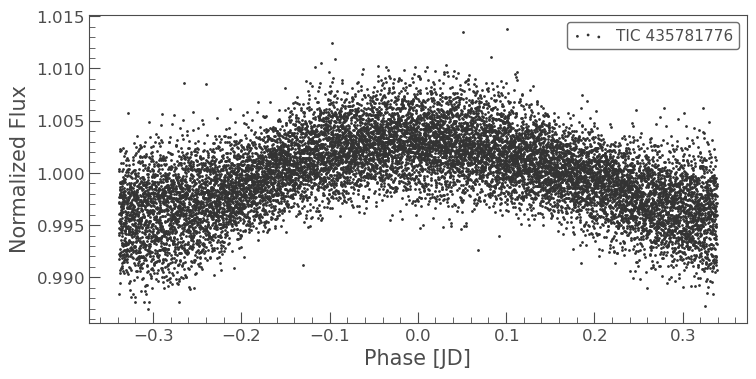

In [97]:
# OBJETO 3: LS II +25 15

TIC = 'TIC 435781776'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 14).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.677533
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

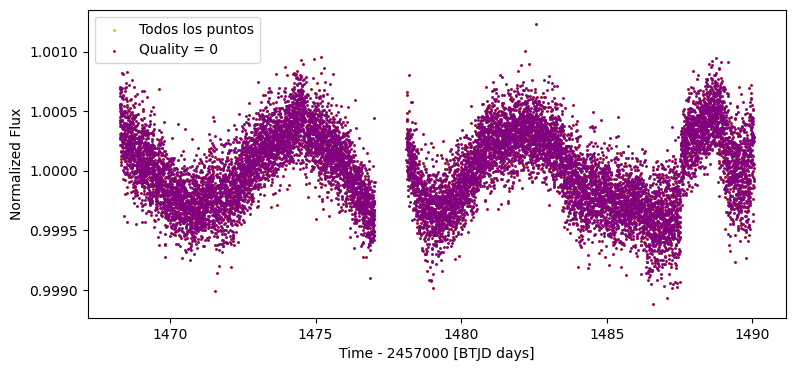

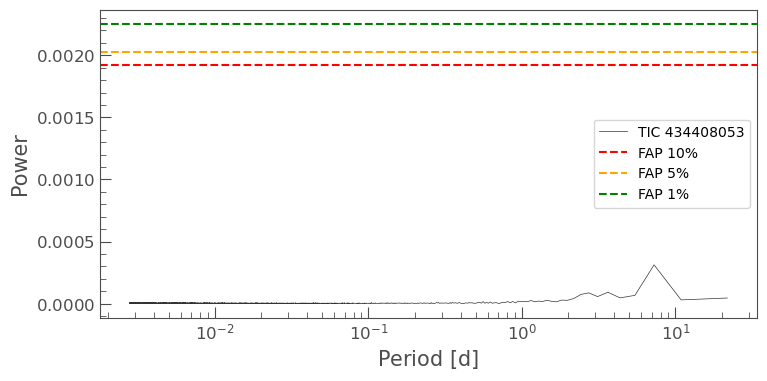

Periodo calculado: 7.2573903349587 d
Periodo real: 7.3338


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

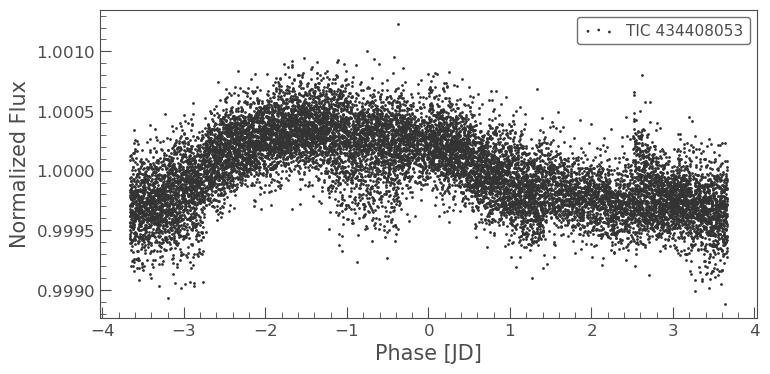

In [99]:
# OBJETO 4: * 73 Ori

TIC = 'TIC 434408053'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 6).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=7.3338
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

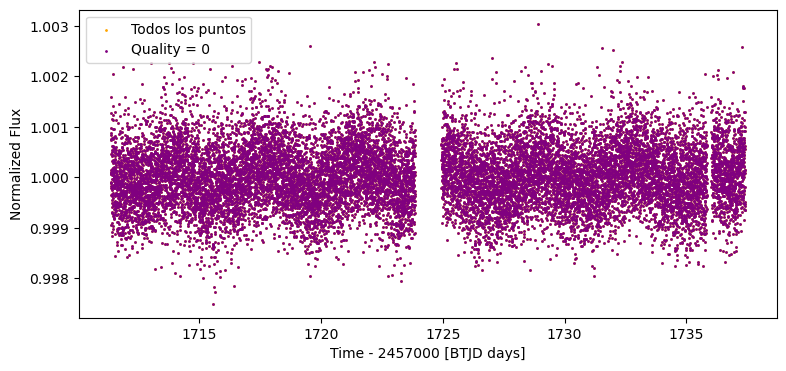

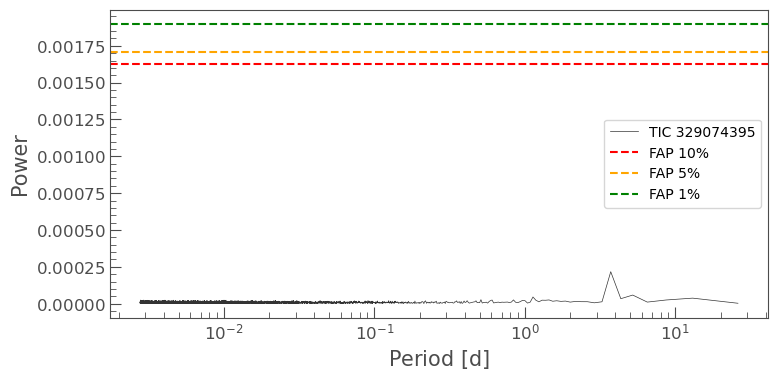

Periodo calculado: 3.720704568494804 d
Periodo real: 3.76682


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

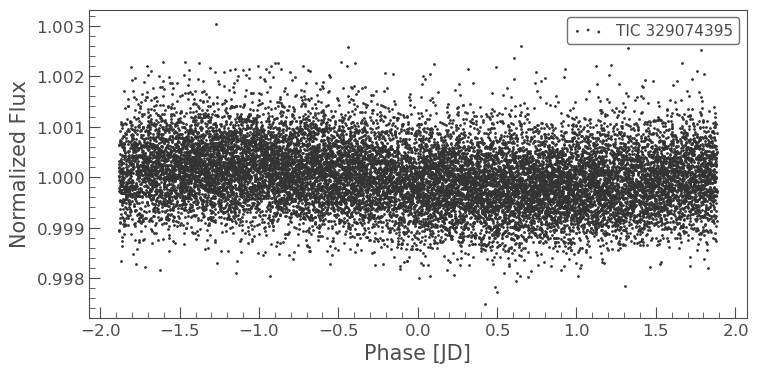

In [102]:
# OBJETO 5: HD 239626

TIC = 'TIC 329074395'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 15).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=3.76682
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

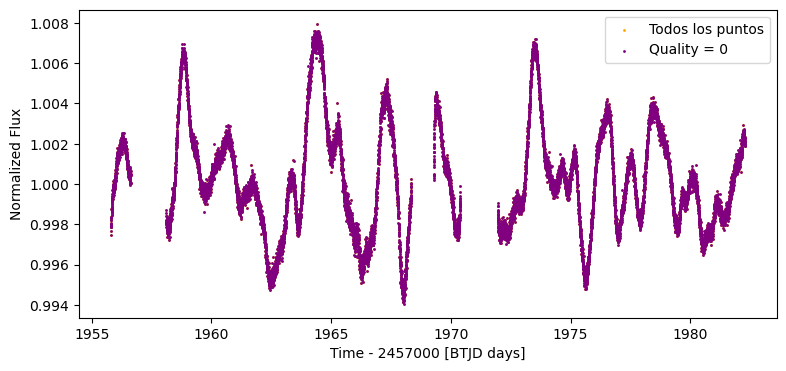

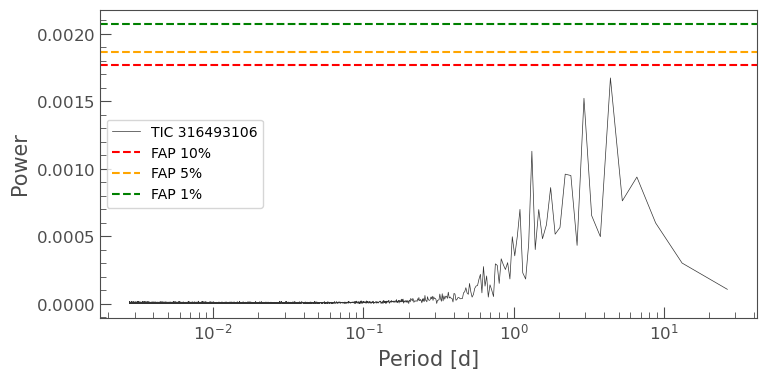

Periodo calculado: 4.414202553529435 d
Periodo real: 4.6325


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

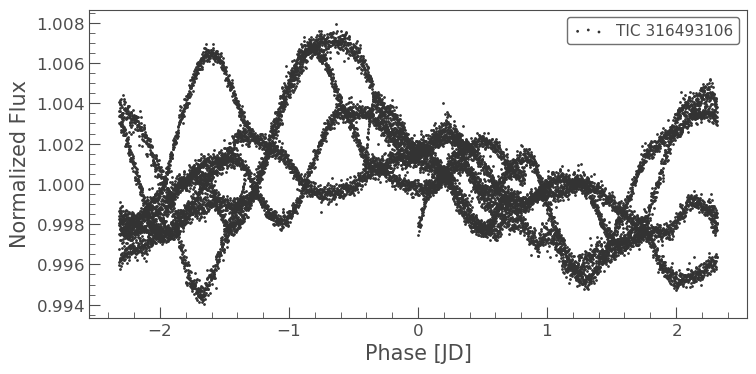

In [103]:
# OBJETO 6: HD 161796

TIC = 'TIC 316493106'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 24).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=4.6325
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

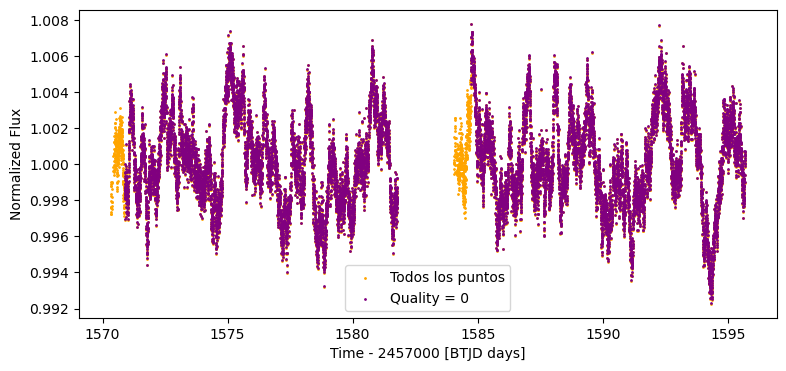

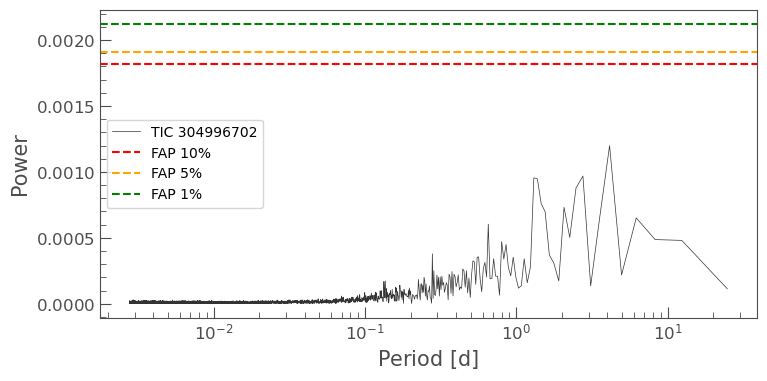

Periodo calculado: 4.133817554220134 d
Periodo real: 1.41379


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

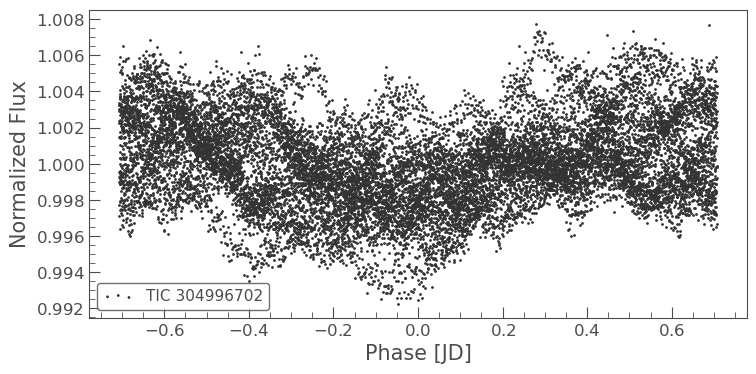

In [104]:
# OBJETO 7: HD 95862

TIC = 'TIC 304996702'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 10).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=1.41379
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

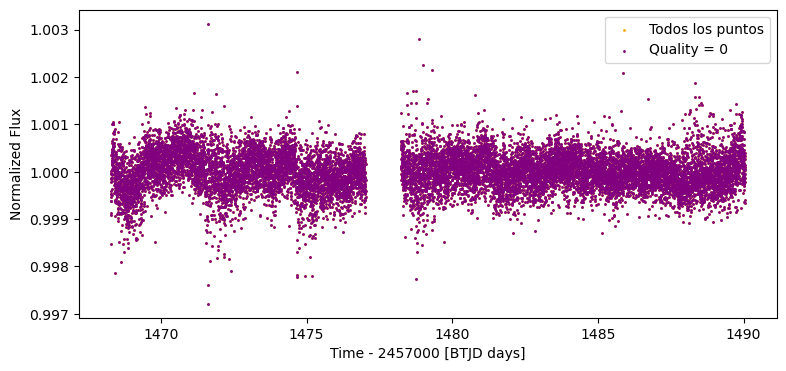

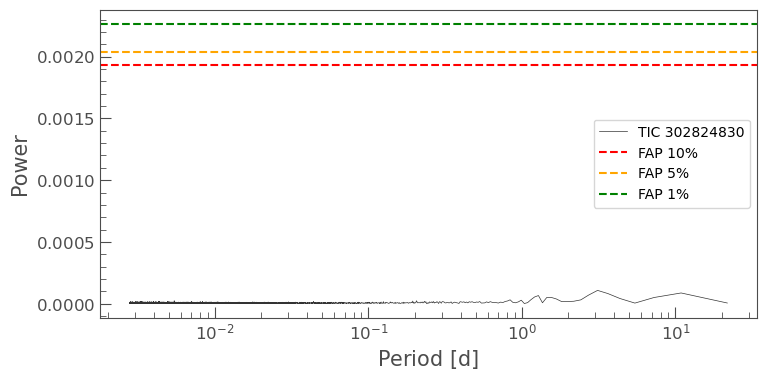

Periodo calculado: 3.1102529264874192 d
Periodo real: 3.27181


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

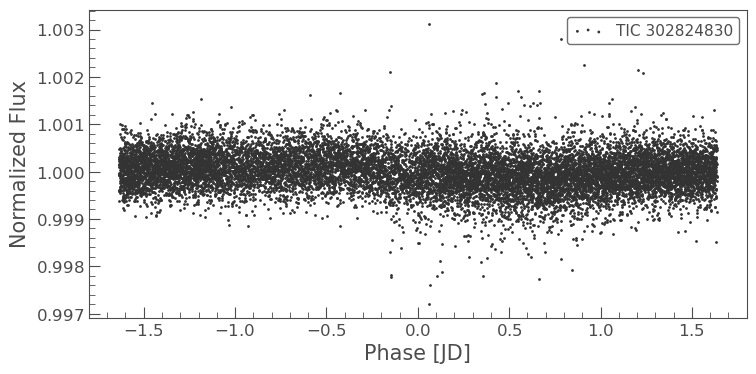

In [106]:
# OBJETO 8: HD 36408A

TIC = 'TIC 302824830'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 6).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=3.27181
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

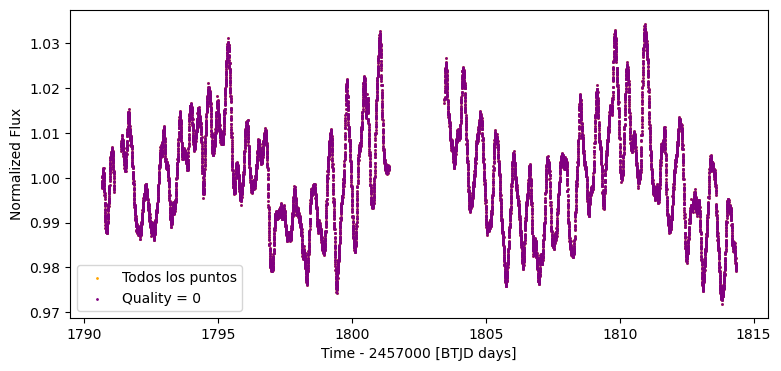

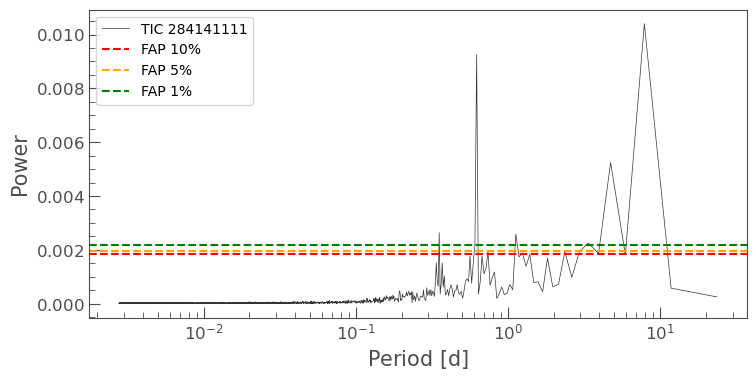

Periodo calculado: 7.895730077097597 d
Periodo real: 0.62248


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

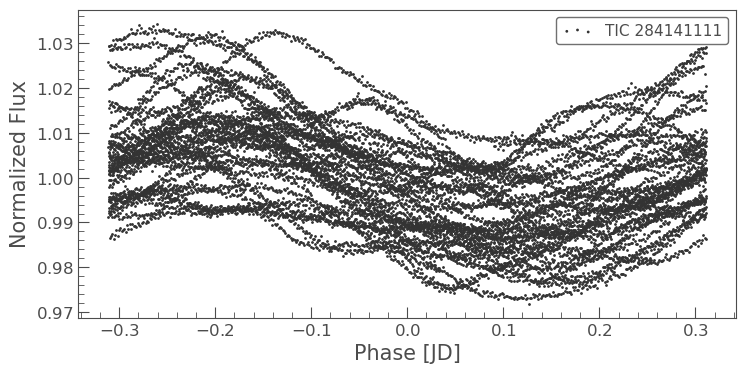

In [107]:
# OBJETO 9: HD 3191

TIC = 'TIC 284141111'

## Todos los puntos
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18).download()
lc = sector_data.remove_nans().normalize()
#lc.normalize().scatter()

## Calidad = 0
lc_good = lc[lc.quality == 0].normalize()

## Crear la figura
plt.figure(figsize=(9,4))
plt.scatter(lc.time.value, lc.flux.value, s=1, color='orange', label='Todos los puntos')
plt.scatter(lc_good.time.value, lc_good.flux.value, s=1, color='purple', label='Quality = 0')
plt.xlabel("Time - 2457000 [BTJD days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

## Periodograma con FAPS 
with np.errstate(invalid='ignore'): # Ignorar warnings de sqrt temporalmente
    pg = lc_good.to_periodogram(oversample_factor=1, method='lombscargle')
ax = pg.plot(view='period')  # Devuelve el eje matplotlib
plt.xscale("log")

# FAPS
t = lc_good.time.value
y = lc_good.flux.value
dy = lc_good.flux_err.value if lc_good.flux_err is not None else None
ls = LombScargle(t, y, dy)
probabilities = [0.1, 0.05, 0.01]
faps = [ls.false_alarm_level(p) for p in probabilities]
colors = ["red", "orange", "green"]
for fap, color, p in zip(faps, colors, probabilities):
    ax.axhline(fap, color=color, linestyle='--', label=f'FAP {p*100:.0f}%')
    
ax.legend()
plt.show()

## Periodo del artículo
period_good=0.62248
print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

Periodo calculado: 3.9675691505999557 d
Periodo real: 0.917772


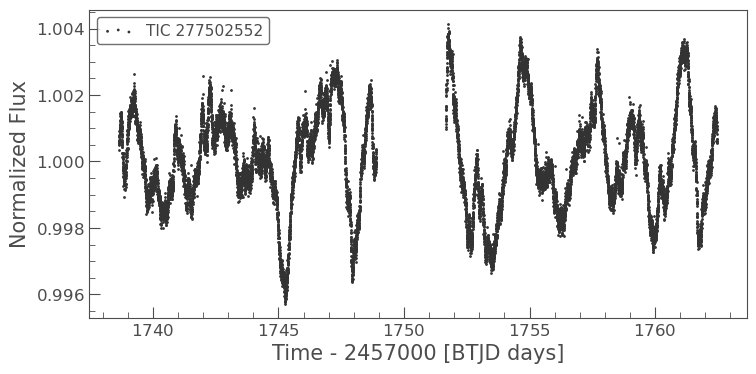

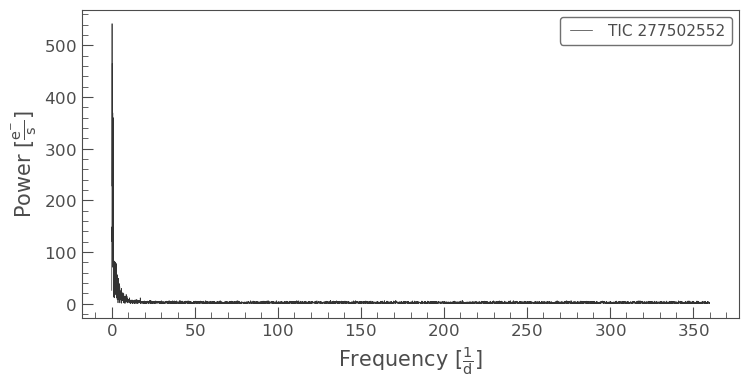

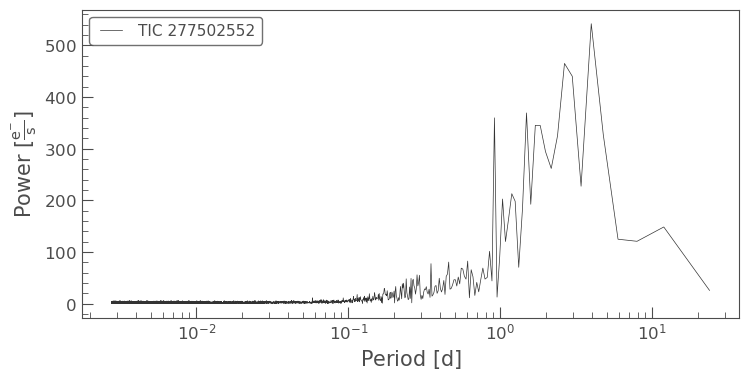

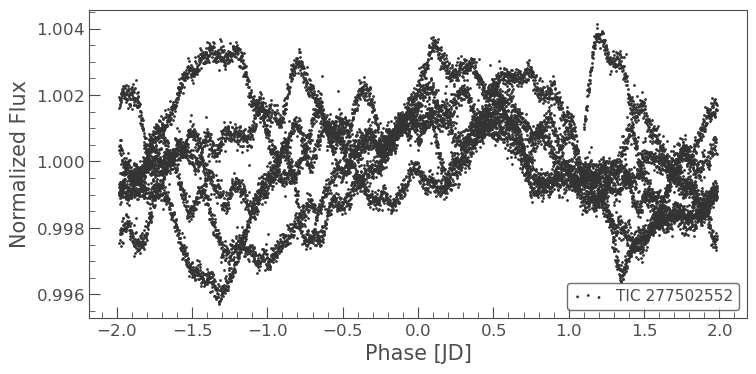

In [39]:
# OBJETO 10: V* V379 Cep

TIC = 'TIC 277502552'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 16)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=0.917772
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
#lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 6.144754001676915 d
Periodo real: 6.67664


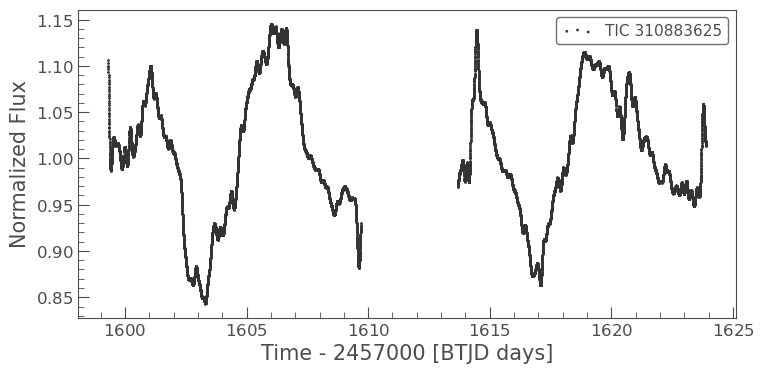

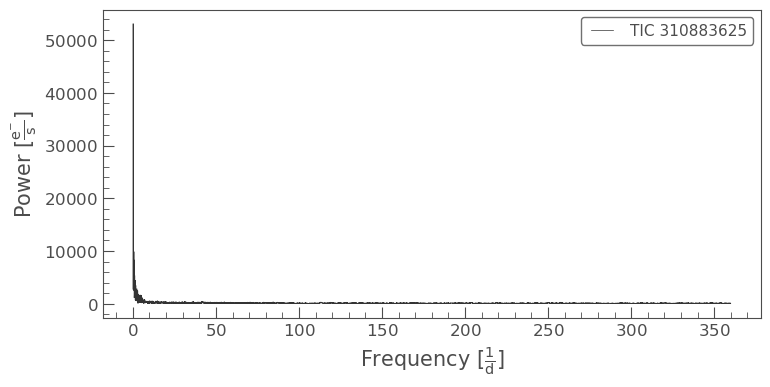

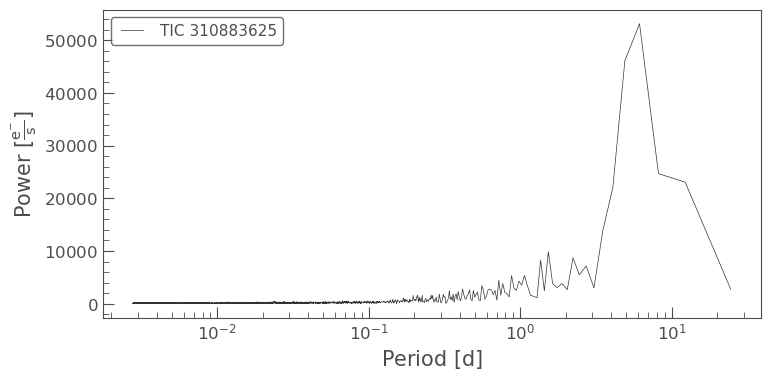

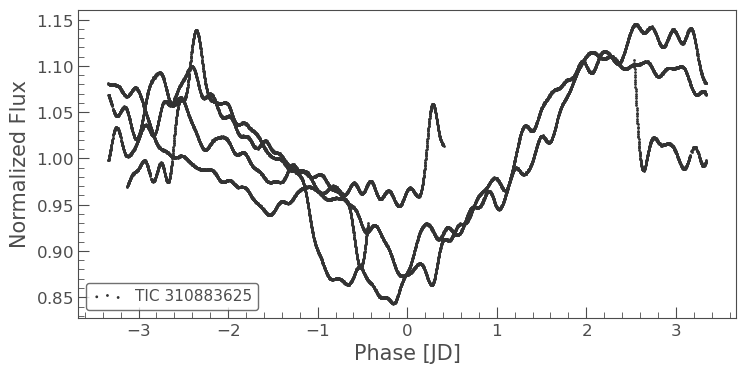

In [41]:
# OBJETO 11: V* T Cru

TIC = 'TIC 310883625'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 11)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=6.67664
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 4.870883217133906 d
Periodo real: 6.98846


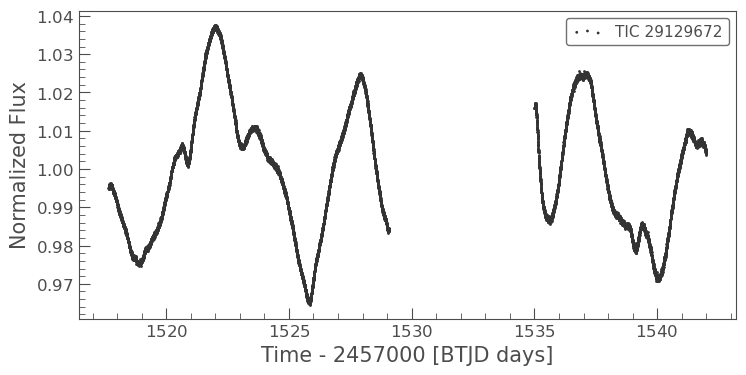

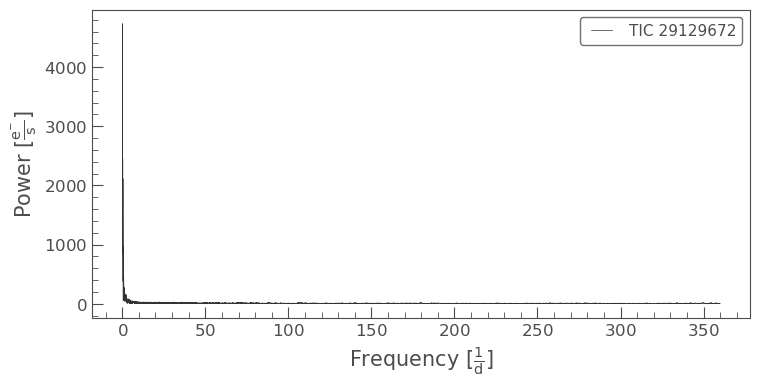

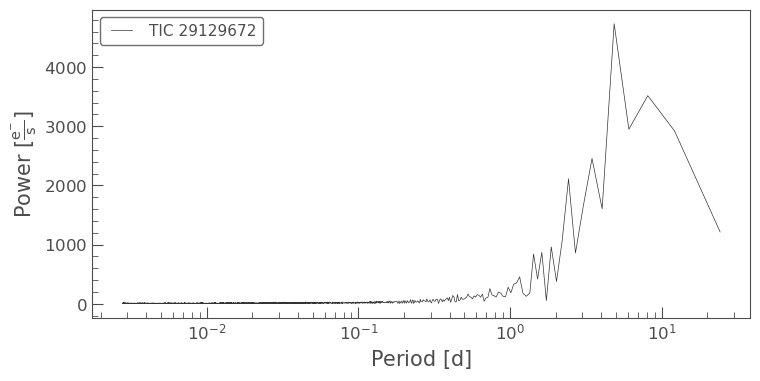

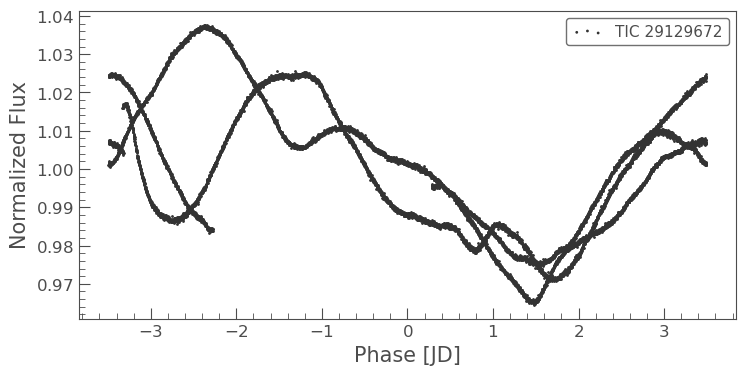

In [44]:
# OBJETO 12: HD 75860

TIC = 'TIC 29129672'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 8)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=6.98846
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 12.29007722443066 d
Periodo real: 12.1547


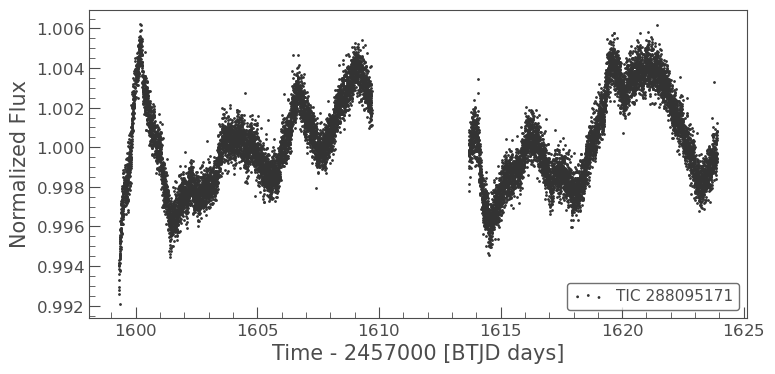

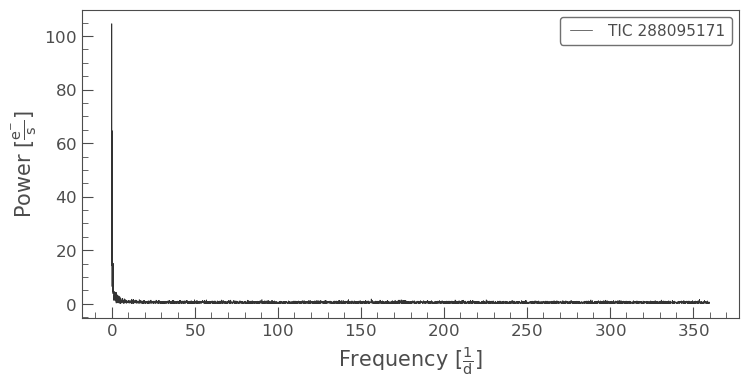

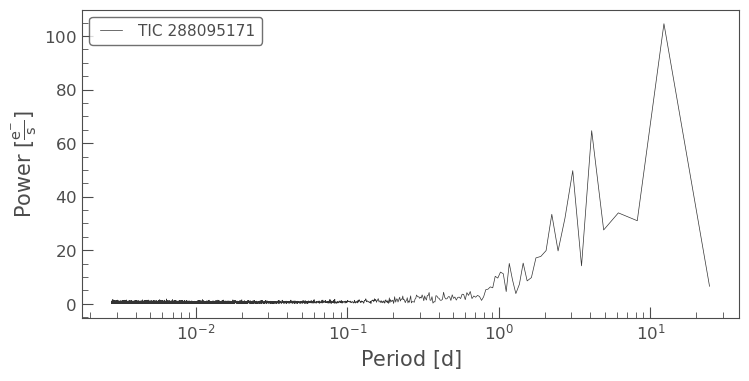

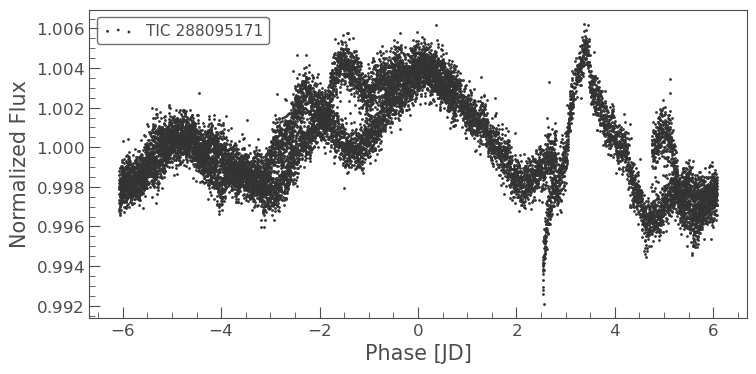

In [45]:
# OBJETO 13: CD-53 4543

TIC = 'TIC 288095171'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 11)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=12.1547
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 24.418253929532966 d
Periodo real: 10.1443


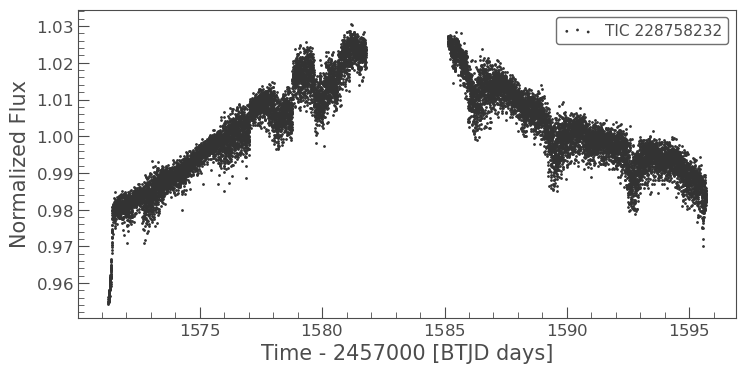

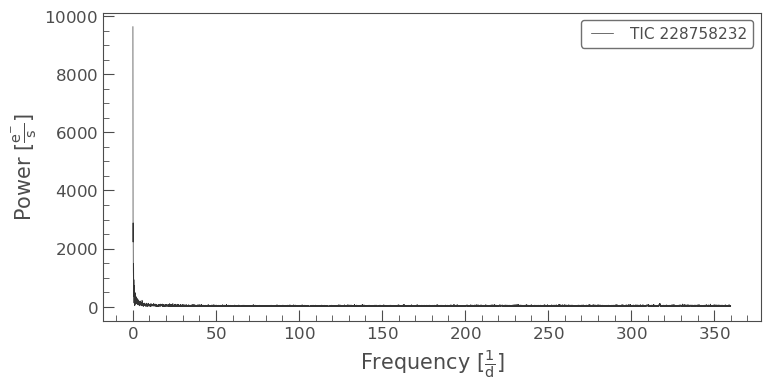

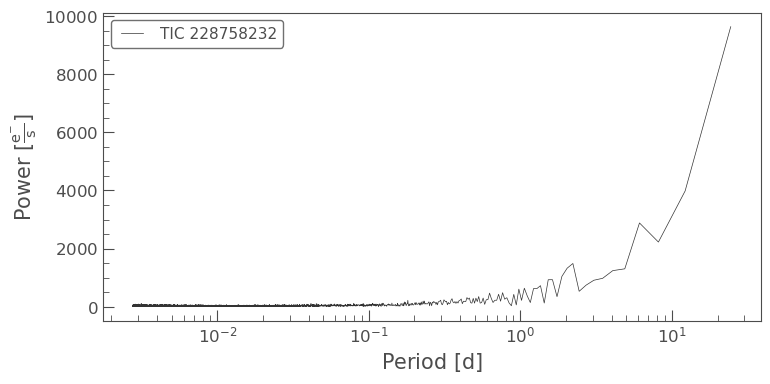

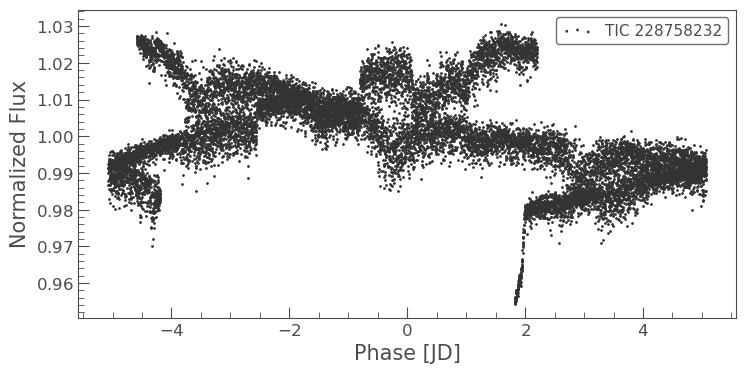

In [46]:
# OBJETO 14: V* LN Hay

TIC = 'TIC 228758232'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 10)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=10.1443
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 8.94966576939881 d
Periodo real: 10.925


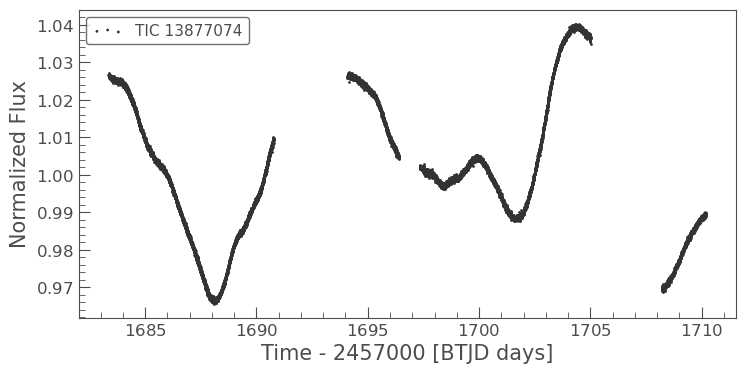

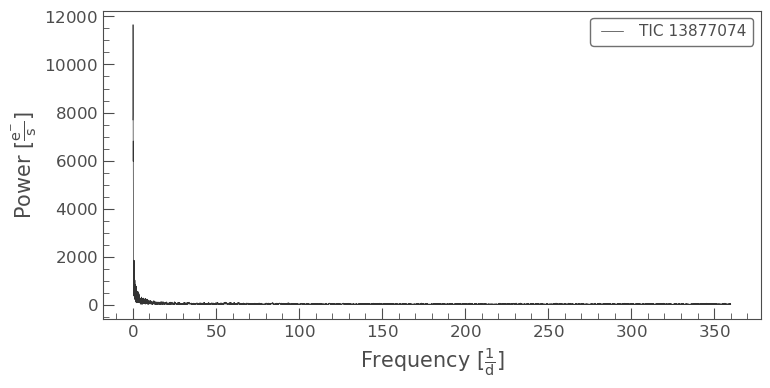

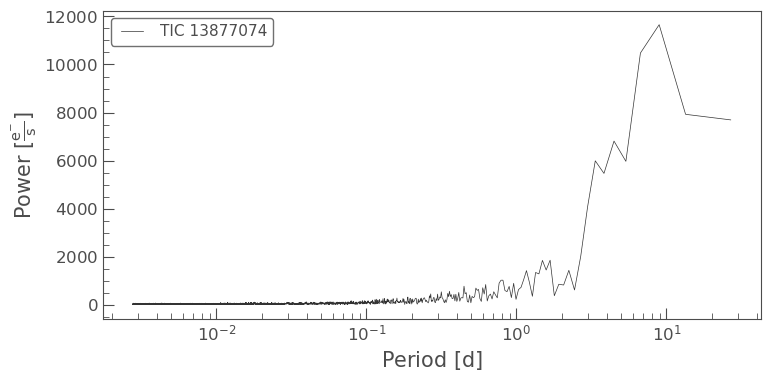

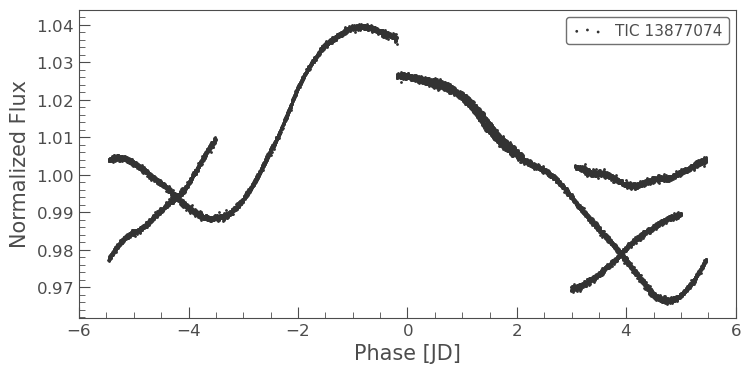

In [47]:
# OBJETO 15: HD 194279

TIC = 'TIC 13877074'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 14)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=10.925
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 8.151446955536661 d
Periodo real: 7.15922


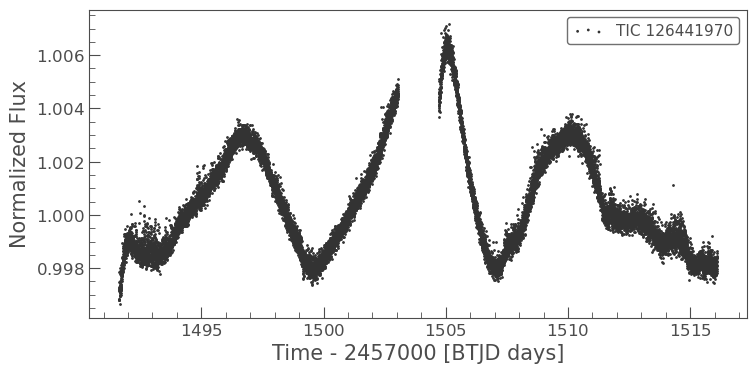

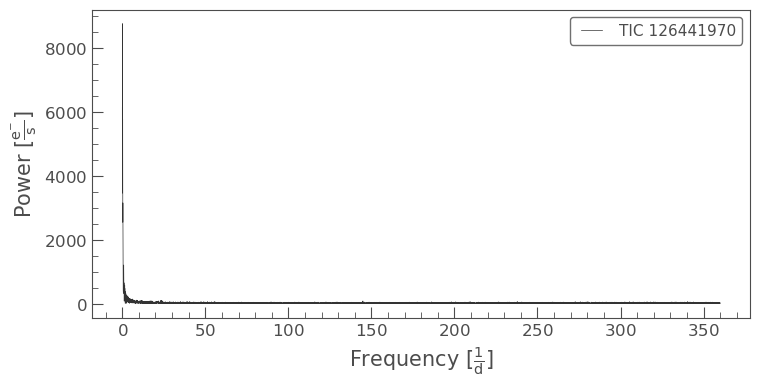

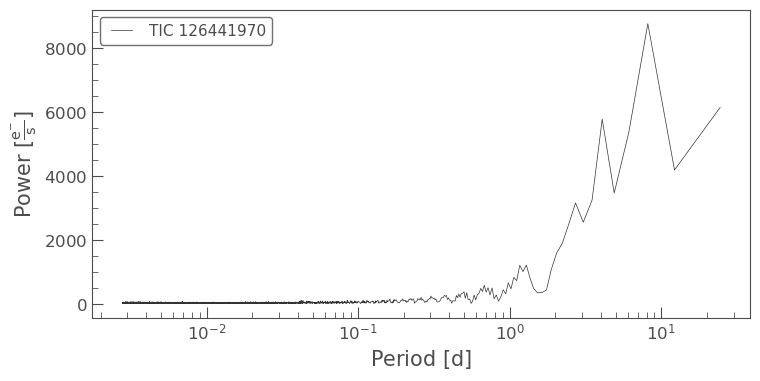

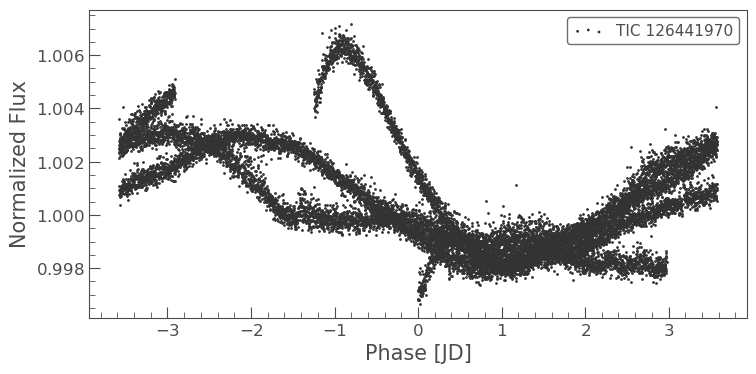

In [48]:
# OBJETO 16: * l Pup

TIC = 'TIC 126441970'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 7)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=7.15922
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 26.84874358053685 d
Periodo real: 7.36621


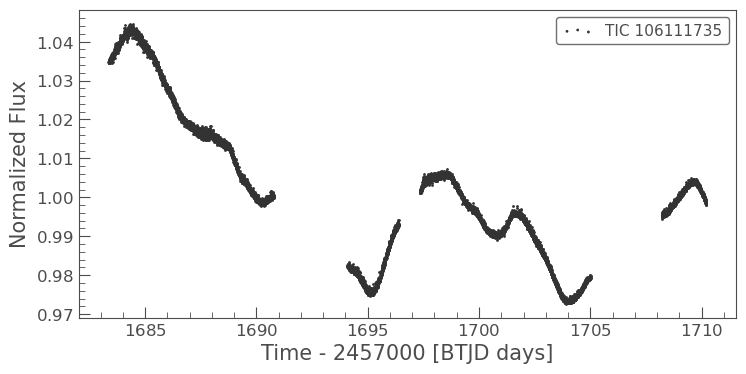

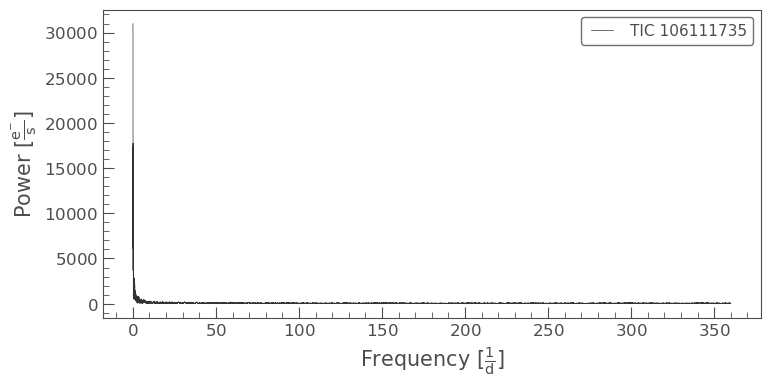

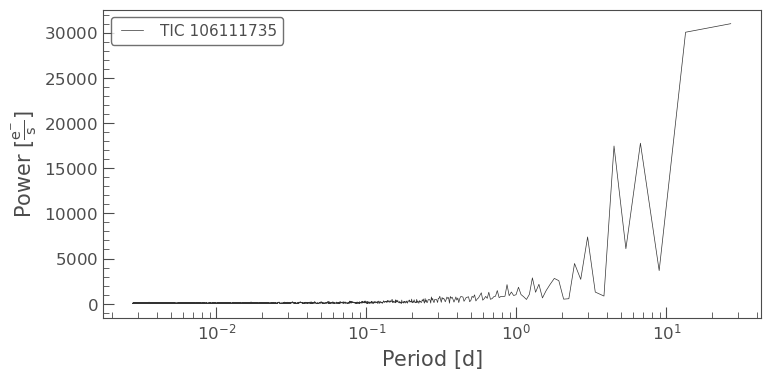

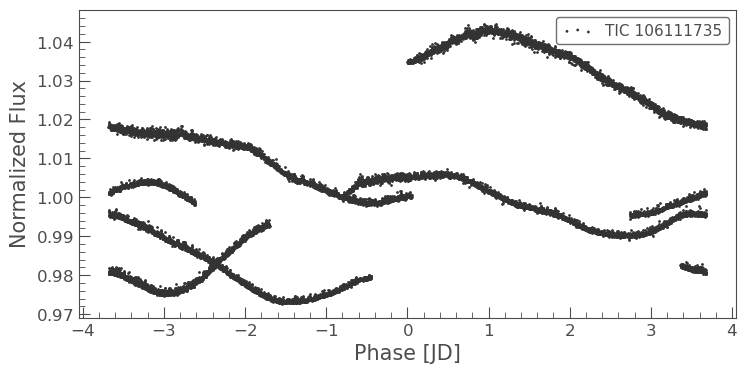

In [49]:
# OBJETO 17: HD 190603

TIC = 'TIC 106111735'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 14)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=7.36621
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 0.13621507805300118 d
Periodo real: 0.543462


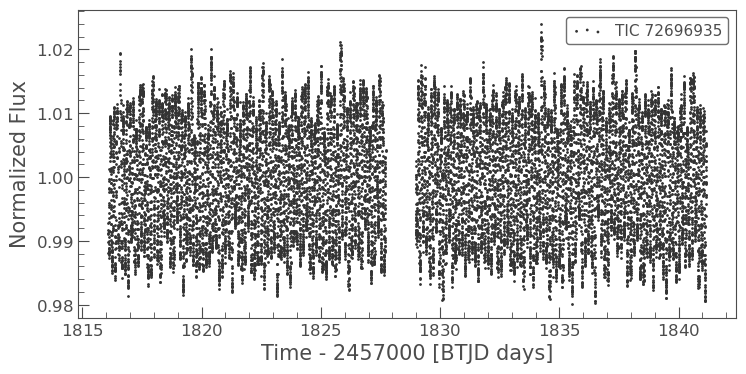

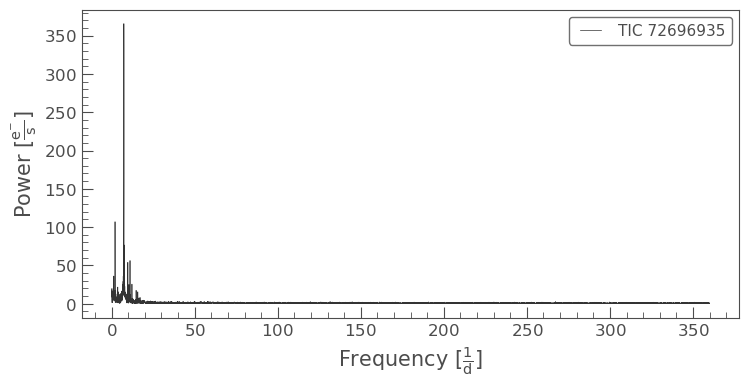

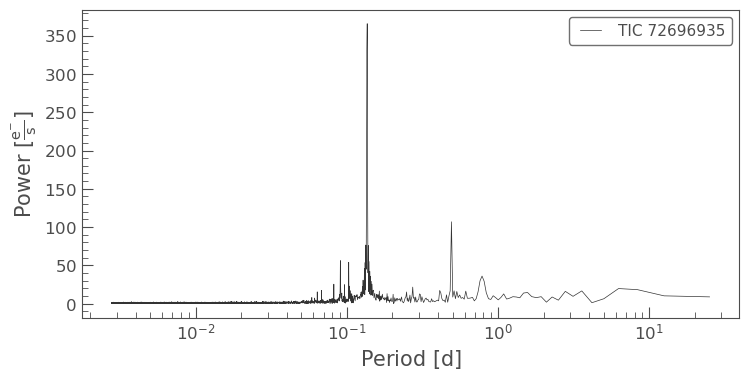

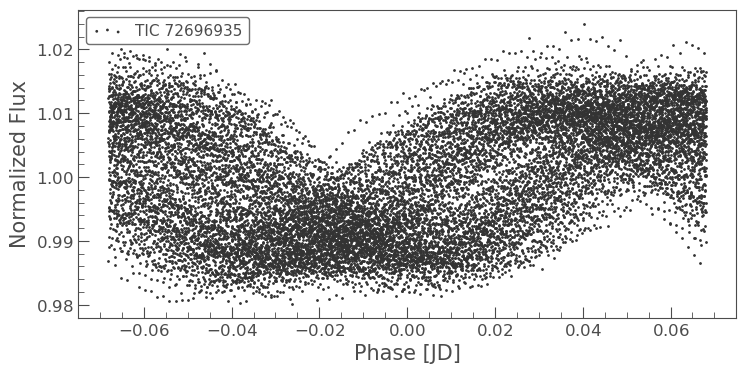

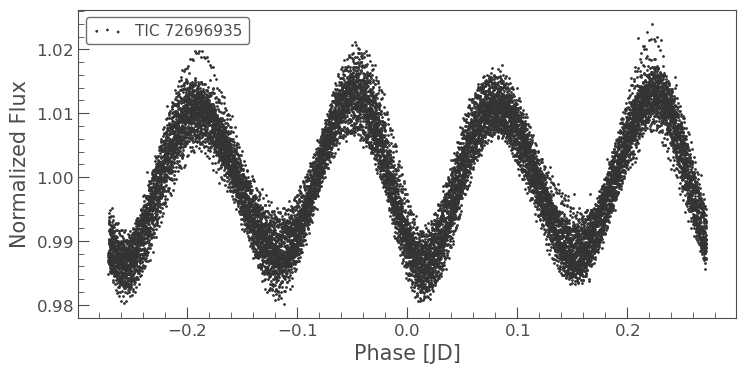

In [51]:
# OBJETO 18: HD 237204
#Posible alias

TIC = 'TIC 72696935'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 19)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=0.543462
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 2.9426126664885084 d
Periodo real: 5.70081


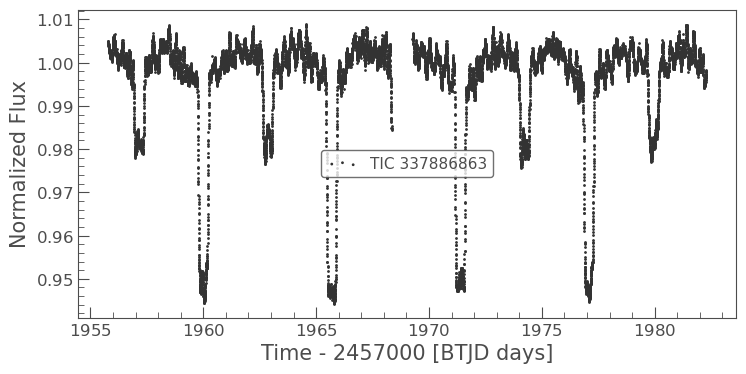

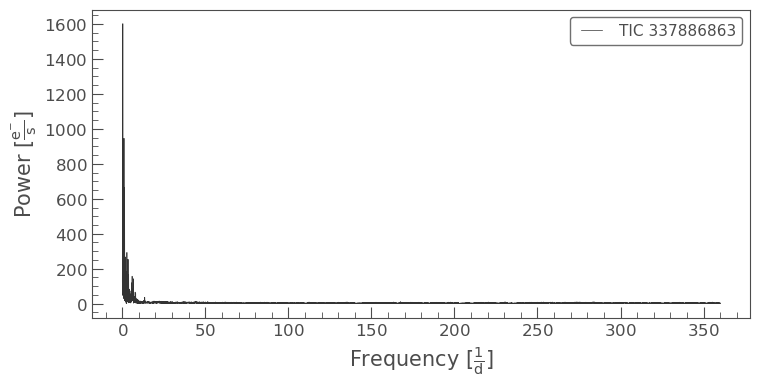

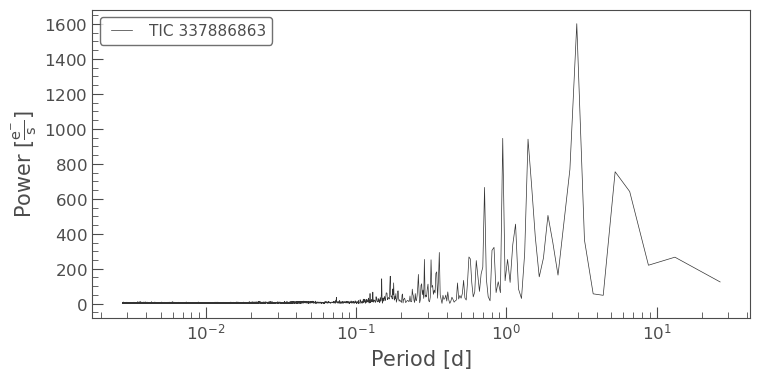

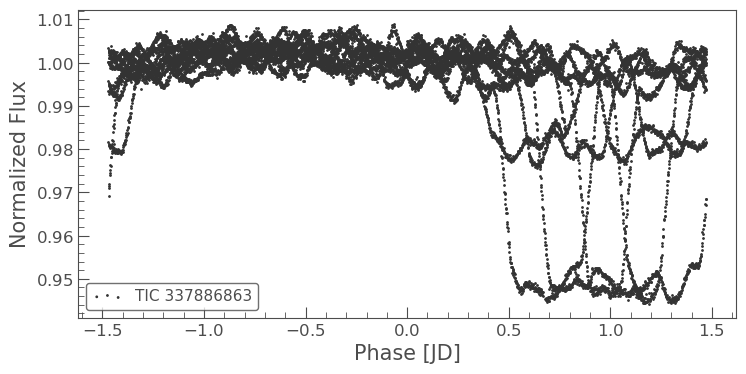

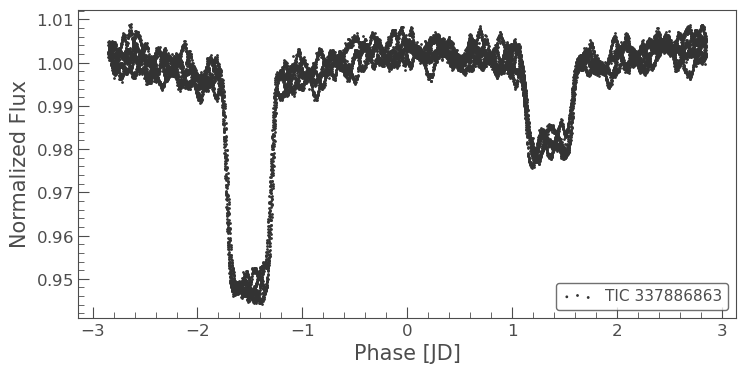

In [53]:
# OBJETO 19: HD 213405

TIC = 'TIC 337886863'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 24)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=5.70081
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 1.702297264542462 d
Periodo real: 1.69606


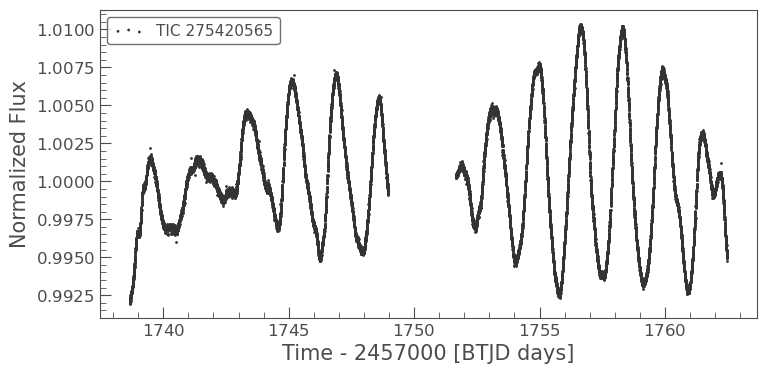

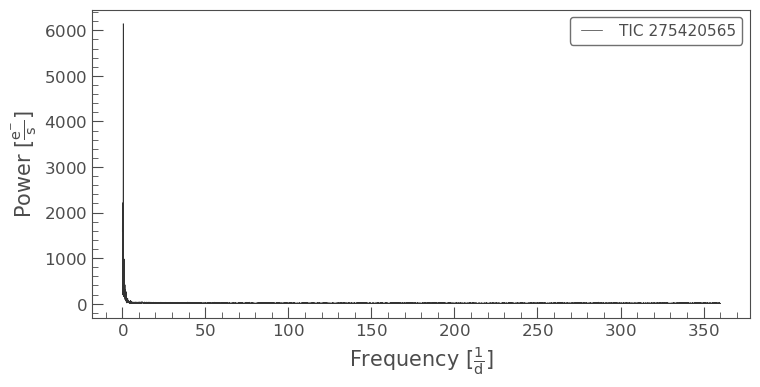

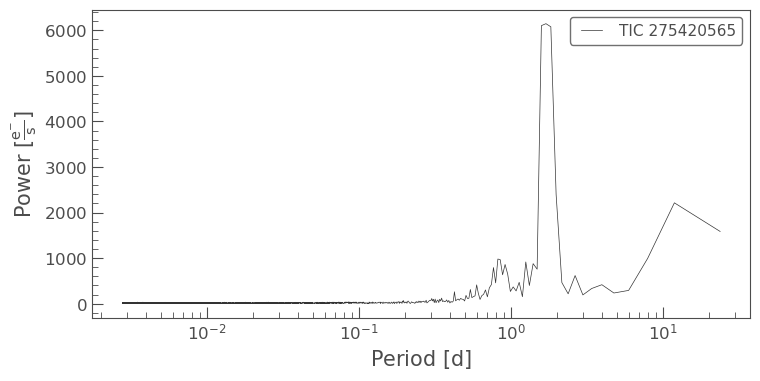

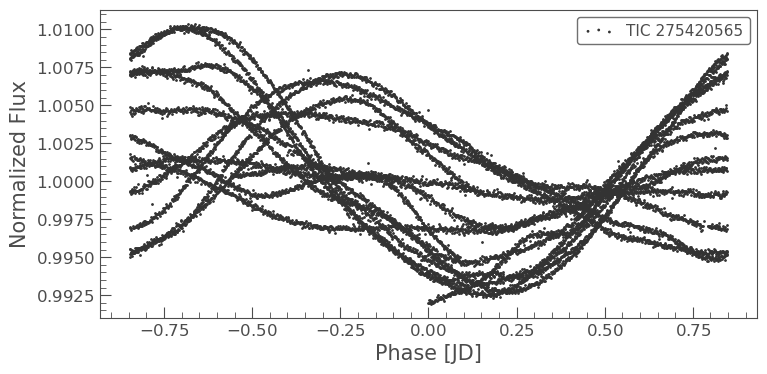

In [54]:
# OBJETO 20: * 6 Cep

TIC = 'TIC 275420565'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 16)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=1.69606
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 0.5663782459105807 d
Periodo real: 0.567339


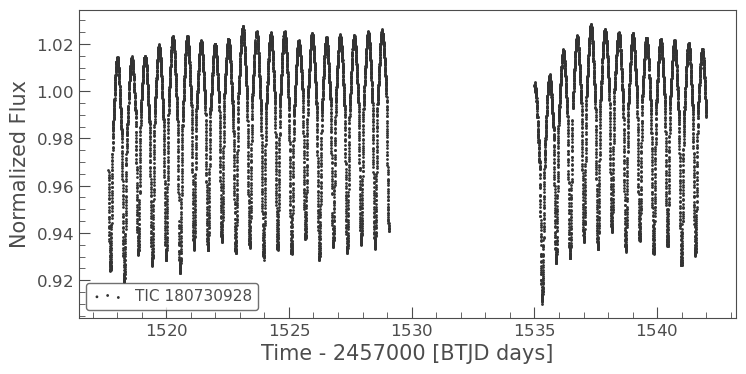

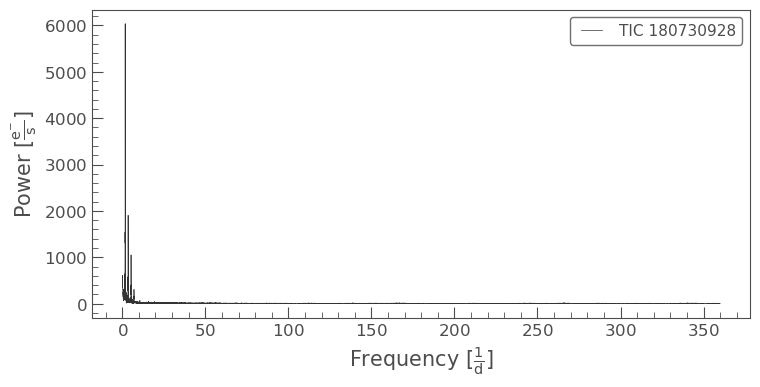

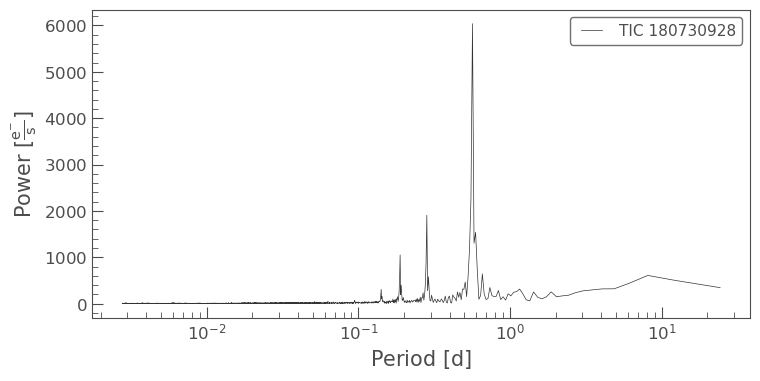

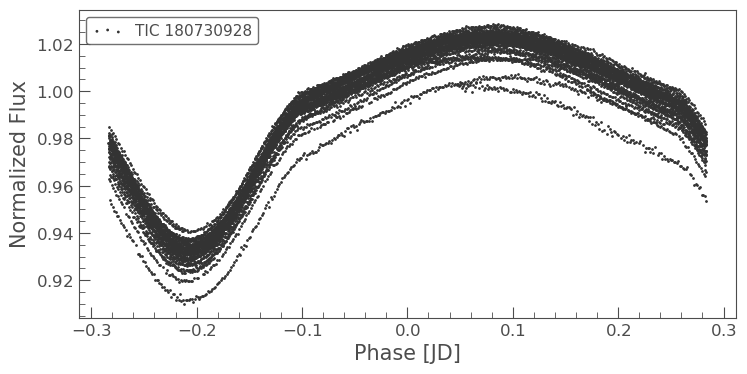

In [55]:
# OBJETO 21: V* V454 Vel

TIC = 'TIC 180730928'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 8)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=0.567339
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")

Periodo calculado: 0.6743279916933863 d
Periodo real: 1.33982


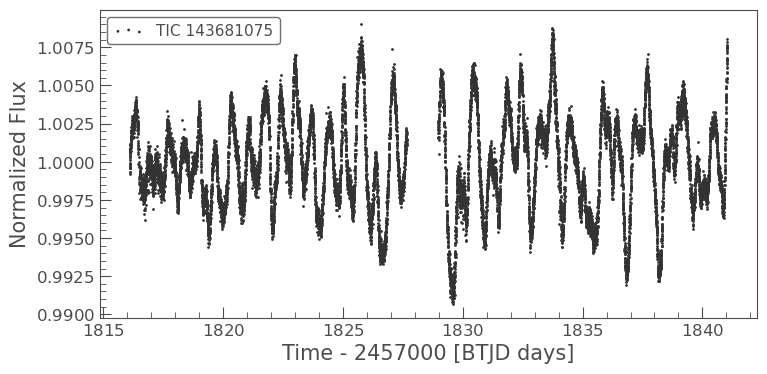

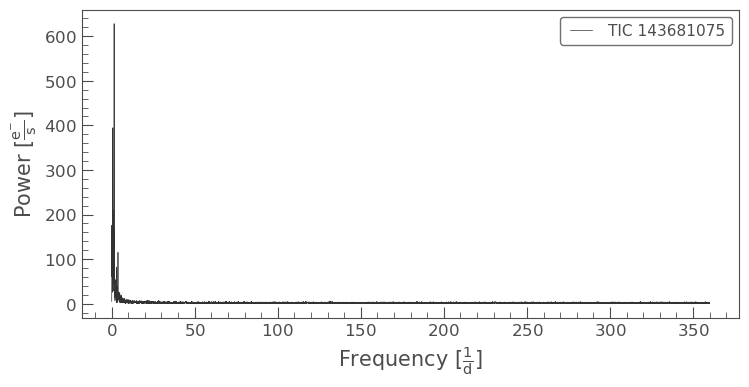

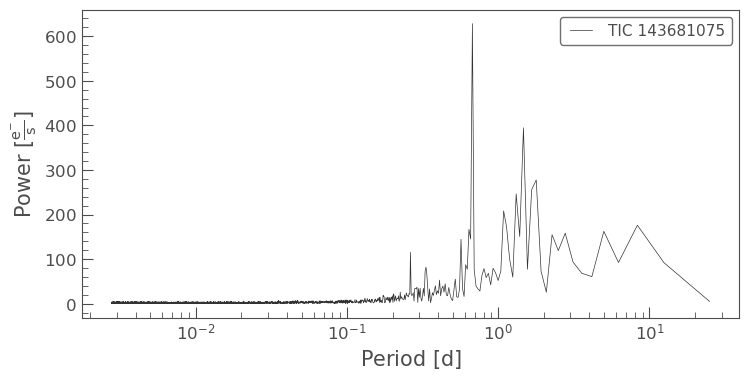

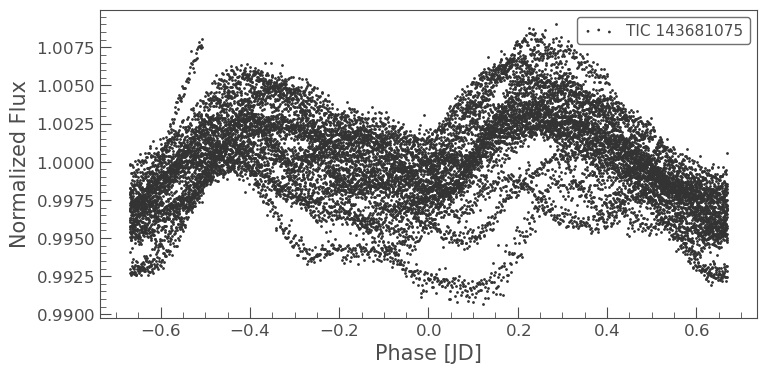

In [56]:
# OBJETO 22: HD 34921

TIC = 'TIC 143681075'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 19)
lc = sector_data.download()
pg = lc.to_periodogram(oversample_factor=1, method='lombscargle')
period_good=1.33982
lc.normalize().scatter()
pg.plot()
pg.plot(view='period')
plt.xscale("log")

#Probamos con el periodo calculado
#lc.fold(period=pg.period_at_max_power).normalize().scatter()

#Probamos con el periodo real
lc.fold(period=period_good).normalize().scatter()

print(f"Periodo calculado: {pg.period_at_max_power}\nPeriodo real: {period_good}")